# __Task A: Investigating Population and Gender Equality in Education__
In the task, you are required to visualise the relationship between the population in different countries, the income in different countries and the gender ratio (women % men, 25 to 34 years) in schools of different countries, and gain insights from how these relations and trends change over time. The data files used in this task were originally downloaded from [Gapminder](https://www.gapminder.org/data). We have extracted the data from the original files and put into a simpler format. Please download the data from Moodle: 
- Population.csv: This file contains yearly data regarding the estimated resident population, grouping by countries around the world, between 1800 and 2018. 
- GenderEquality.csv: This data file contains yearly data about the ratio of female to male number of years in school, among 25- to 34-years-olds, including primary, secondary and tertiary education across different countries around the world, for the period between 1970 and 2015. 
- Income.csv: This data file contains yearly data of income per person adjusted for differences in purchasing power (in international dollars) across different countries around the world, for the period between 1800 and 2018. 

## A1. Investigating the Population Data 

Have a look at the resident population data. You will see many columns representing different countries. 

#####  1. In Python plot the population growth of Australia, China and United States over time. 

In [240]:
from motionchart.motionchart import MotionChart
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [241]:
population = pd.read_csv('Population.csv')
population.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,3280000,410000,2500000,2650,1570000,37000,534000,413000,351000,...,12300000,6800000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1,1801,3280000,412000,2510000,2650,1570000,37000,534000,413000,350000,...,12500000,6930000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
2,1802,3280000,413000,2520000,2650,1570000,37000,534000,413000,349000,...,12600000,7070000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
3,1803,3280000,414000,2530000,2650,1570000,37000,534000,413000,348000,...,12800000,7200000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
4,1804,3280000,416000,2540000,2650,1570000,37000,534000,413000,348000,...,13000000,7340000,55000,1920000,27800,718000,6550000,2590000,747000,1090000


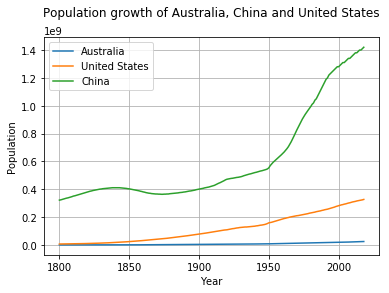

In [242]:
plt.plot(population['Year'],population['Australia'] , label='Australia')
plt.plot(population['Year'],population['United States'] , label='United States')
plt.plot(population['Year'],population['China'] , label='China')
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.title ("Population growth of Australia, China and United States\n")
plt.grid(True)
#China    1420/ 322. Australia    24.8/.333 United States    327/6.800
plt.show()

###### 1.1. Are the population values increasing or decreasing over time? 
   Population is increasing over time especially from year 1950.

##### 2. Fit a linear regression using Python to the Chinese population data and plot the linear fit. 

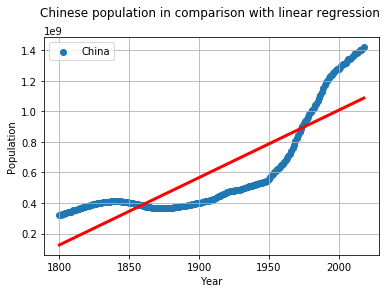

In [243]:
plt.scatter(population['Year'],population['China'])
slope, intercept, r_value, p_value, std_err = linregress(population['Year'],population['China'])
line = [slope*xi + intercept for xi in population['Year']]
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.title ("Chinese population in comparison with linear regression \n")
plt.grid(True)
plt.plot(population['Year'],line,'r-', linewidth=3)
plt.show()

###### - Does the linear fit look good? 

Linear regression is not the perfect fit for this data, as it is clear that from 1869-1960 population was lower than what was expected. And from year 1960 and onwards population was way too much than what was expected

###### - Use the linear fit to predict the resident population in China in 2020 and 2100. 

 

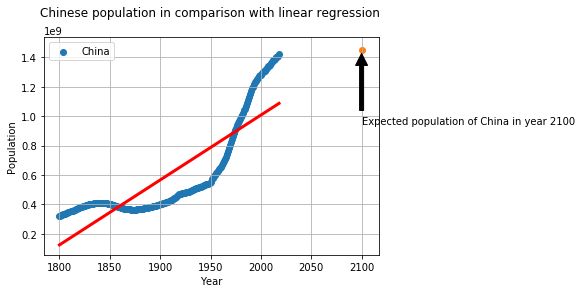

In [244]:
plt.scatter(population['Year'],population['China'])
slope, intercept, r_value, p_value, std_err = linregress(population['Year'],population['China'])
line = [slope*xi + intercept for xi in population['Year']]
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.title ("Chinese population in comparison with linear regression \n")
plt.plot(population['Year'],line,'r-', linewidth=3)
plt.plot(2020,slope*2020+intercept)
plt.scatter(2100,slope*2100+intercept)
ypred= slope*2100+intercept
plt.annotate('Expected population of China in year 2100', xy=(2100,ypred), xytext=(2100, ypred-500000000),arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True)
plt.show()

Ans. According to linear regression method population of China is expected to be around 1.5 *10^9

###### - Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from 1960 onwards). How is the fit? Which model would give better predictions of future population in China do you think?

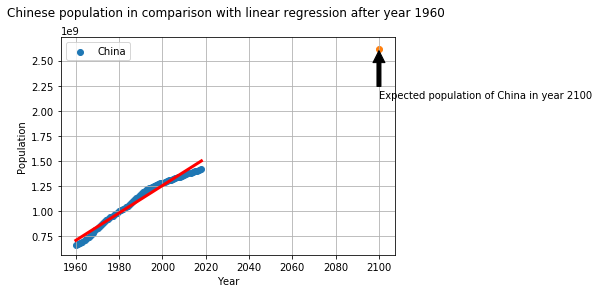

In [245]:
filt =(population.Year>=1960)
pop_gt_1960=population[filt]

plt.scatter(pop_gt_1960['Year'],pop_gt_1960['China'])
slope, intercept, r_value, p_value, std_err = linregress(pop_gt_1960['Year'],pop_gt_1960['China'])
line = [slope*xi + intercept for xi in pop_gt_1960['Year']]
plt.plot(pop_gt_1960['Year'],line,'r-', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
ypred=slope*2100+intercept
plt.scatter(2100,ypred)
plt.title ("Chinese population in comparison with linear regression after year 1960 \n")
plt.annotate('Expected population of China in year 2100', xy=(2100,ypred), xytext=(2100, ypred-500000000),arrowprops=dict(facecolor='black', shrink=0.05))

plt.grid(True)
plt.show() 

Ans. The model after year 1960 seems more fit for prediction.

## A2. Investigating the Gender Equality Data 

Now have a look at the gender equality data. 

###### 1. Use Python to plot the gender ratio (women % men) in schools for Australia, China and United States over time.  

In [246]:
ge = pd.read_csv('GenderEquality.csv')
ge.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1970,15.4,87.4,90.0,97.0,51.3,103,96.7,91.7,95.2,...,90.6,96.8,100,87.8,75.9,92.9,79.9,11.2,58.2,69.6
1,1971,15.8,87.9,90.3,97.4,51.4,103,97.2,92.1,95.5,...,91.0,96.8,101,88.3,76.4,93.5,80.5,11.3,58.9,70.0
2,1972,15.4,88.3,90.2,97.8,51.9,104,97.5,92.5,95.7,...,91.4,97.0,101,88.8,76.9,93.8,81.1,11.4,59.4,70.5
3,1973,15.6,88.9,90.5,98.1,52.3,104,97.8,92.9,96.1,...,91.8,97.1,101,89.1,77.4,94.3,81.3,11.9,60.1,71.1
4,1974,15.9,89.2,90.4,98.4,52.8,104,98.3,93.5,96.3,...,92.2,97.2,102,89.6,77.9,94.8,81.9,12.0,60.8,71.5


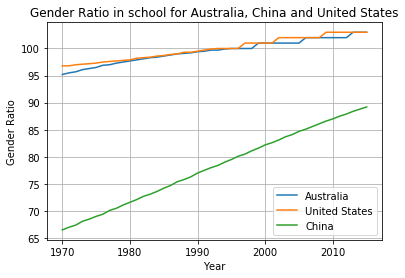

In [247]:
plt.plot(ge['Year'],ge['Australia'] , label='Australia')
plt.plot(ge['Year'],ge['United States'] , label='United States')
plt.plot(ge['Year'],ge['China'] , label='China')
plt.xlabel("Year")
plt.ylabel("Gender Ratio")
plt.legend()
plt.title ("Gender Ratio in school for Australia, China and United States")
plt.grid(True)
plt.show()

    Q. How do you compare the trend in gender ratio (women % men) in schools for these three countries over the time period? Which two countries have similar growth trend?  
    Ans. Gender Ratio is increasing over time. United states and Australia have similar growth trend.

 Q. What are the maximum and minimum values for gender ratio in Australia over the time period? 

Minimum Gender Ratio for Australia is 95.2
Maximum Gender Ratio for Australia is 103.0


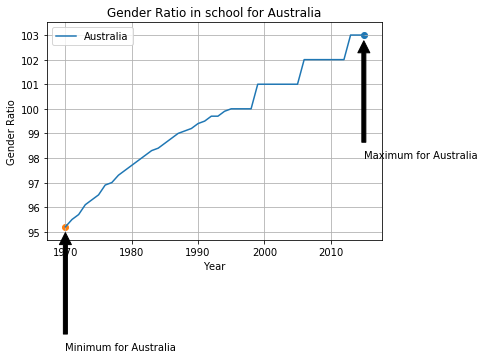

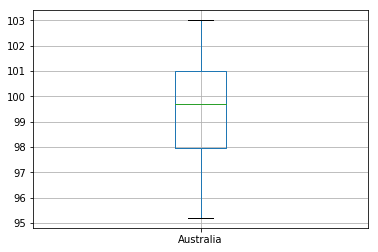

In [248]:
plt.plot(ge['Year'],ge['Australia'] , label='Australia')
ymax=ge['Australia'].max()
filt=ge.Australia==ymax
xmax=ge[filt].Year.max()
plt.annotate('Maximum for Australia', xy=(xmax,ymax), xytext=(xmax, ymax-5),arrowprops=dict(facecolor='black', shrink=0.05))
ymin=ge['Australia'].min()
filt=ge.Australia==ymin
xmin=ge[filt].Year.max()
plt.scatter(xmax,ymax)
plt.scatter(xmin,ymin)
print("Minimum Gender Ratio for Australia is",ymin)
print("Maximum Gender Ratio for Australia is",ymax)
plt.annotate('Minimum for Australia', xy=(xmin,ymin), xytext=(xmin, ymin-5),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("Year")
plt.ylabel("Gender Ratio")
plt.legend()
plt.title ("Gender Ratio in school for Australia")
plt.grid(True)
plt.show()
ge.boxplot(column='Australia')

Ans. Minimum value over the period is 95.20 and maximum valus is 103

###### 2. Fit a linear regression to the gender ratio in schools in United States and plot it. 

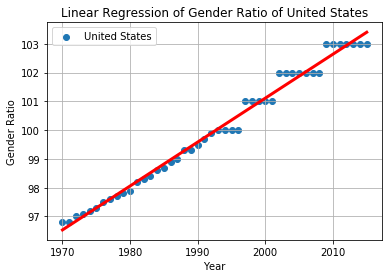

In [249]:
plt.scatter(ge['Year'],ge['United States'])
slope, intercept, r_value, p_value, std_err = linregress(ge['Year'],ge['United States'])
line = [slope*xi + intercept for xi in ge['Year']]
plt.plot(ge['Year'],line,'r-', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Gender Ratio")
plt.legend()
plt.title ("Linear Regression of Gender Ratio of United States")
plt.grid(True)
plt.show()

Q Does it look like a good fit to you? Would you believe the predictions of the linear model going forward? 

Ans. Linear Regression model looks good fit over the given time. I will try to use the model over large dataset to confirm on the adaptability, as population varieance from linear model seems to increase with time.

## A3. Investigating the Income Data 
Now have a look at the Income data.

In [250]:
income = pd.read_csv('Income.csv')
income.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,603,667,715,1200,618,757,1510,514,814,...,3430,2130,1760,502,585,682,861,877,663,869
1,1801,603,667,716,1200,620,757,1510,514,816,...,3440,2170,1760,502,586,682,861,879,665,870
2,1802,603,667,717,1200,623,757,1510,514,818,...,3450,2200,1760,502,586,682,861,882,667,871
3,1803,603,667,718,1200,626,757,1510,514,820,...,3340,2170,1760,502,586,682,861,884,668,872
4,1804,603,667,719,1210,628,757,1510,514,822,...,3290,2170,1760,503,586,682,861,887,670,873


###### 1. Use Python to plot the Income of Australia, China and United States over time

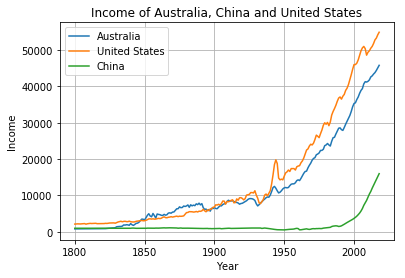

In [251]:
plt.plot(income['Year'],income['Australia'] , label='Australia')
plt.plot(income['Year'],income['United States'] , label='United States')
plt.plot(income['Year'],income['China'] , label='China')
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend()
plt.title ("Income of Australia, China and United States")
plt.grid(True)
plt.show()

Q What was the minimum income in China recorded in the dataset and when did that occur? What was the income in Australia in the same year?  

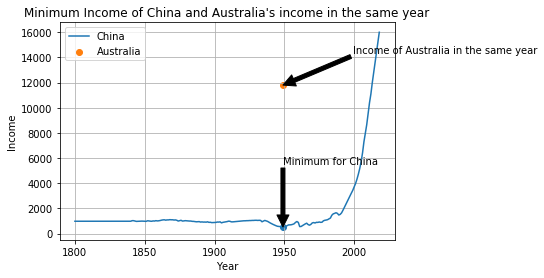

In [252]:
plt.plot(income['Year'],income['China'] , label='China')


ymin=income['China'].min()
filt=income.China==ymin
xmin=income[filt].Year.max()
plt.scatter(xmin,ymin)
plt.annotate('Minimum for China', xy=(xmin,ymin), xytext=(xmin, ymin+5000),arrowprops=dict(facecolor='black'))
new_filt=income['Year']==xmin
yus=income[new_filt].Australia
plt.scatter(xmin,yus)
plt.annotate('Income of Australia in the same year', xy=(xmin,yus), xytext=(xmin+50, yus+2500),arrowprops=dict(facecolor='black'))
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend()
plt.title ("Minimum Income of China and Australia's income in the same year")
plt.grid(True)
plt.show()


Ans. Minimum Income in China was observed in year 1950 at around 850\$ while In the same year Australia's Income was 12000$

## A4. Visualising the Relationship between Gender Equality and Population 

Now let's look at the relationship between gender ratio in schools and the population. 

###### 1. Use Python to combine the data from the different files into a single table. The table should contain population values, income and gender ratio in schools for the different years and different countries.

In [255]:

income_new = pd.melt(income,id_vars='Year', var_name= 'Country')
income_new.rename(columns = {'value':'Income'}, inplace = True)
income_new


ge_new = pd.melt(ge,id_vars='Year', var_name= 'Country')
ge_new.rename(columns = {'value':'Gender Ratio'}, inplace = True)

population_new = pd.melt(population,id_vars='Year', var_name= 'Country')
population_new.rename(columns = {'value':'Population'}, inplace = True)

df3 = pd.merge(income_new, ge_new, on=['Year','Country'])
combine =pd.merge(df3,population_new, on=['Year','Country'] )
combine.head()

,Year,Country,Income,Gender Ratio,Population
0,1970,Afghanistan,1180,15.4,11100000
1,1971,Afghanistan,1100,15.8,11400000
2,1972,Afghanistan,1050,15.4,11700000
3,1973,Afghanistan,1150,15.6,12000000
4,1974,Afghanistan,1180,15.9,12300000
5,1975,Afghanistan,1210,16.1,12600000
6,1976,Afghanistan,1240,16.4,12800000
7,1977,Afghanistan,1130,16.6,13100000
8,1978,Afghanistan,1190,16.2,13200000
9,1979,Afghanistan,1170,16.4,13300000


Q What is the first year and last year for the combined data? 

In [15]:
print("First year in the data is ",combine['Year'].min())
print("Last year in the data is ",combine['Year'].max())


First year in the data is  1970
Last year in the data is  2015


###### 2. Now that you have the data aggregated, we can see whether there is a relationship between gender ratio in schools and the population. Plot the values against each other. 

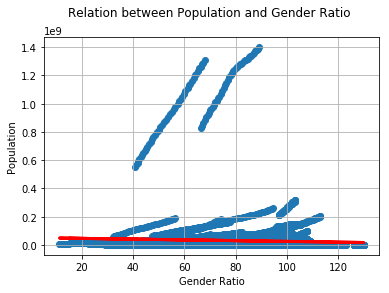

In [16]:
plt.scatter(combine['Gender Ratio'], combine['Population'])
plt.xlabel("Gender Ratio")
plt.ylabel("Population")
plt.title ("Relation between Population and Gender Ratio \n")
slope, intercept, r_value, p_value, std_err = linregress(combine['Gender Ratio'], combine['Population'])
line = [slope*xi + intercept for xi in combine['Gender Ratio']]
plt.plot(combine['Gender Ratio'],line,'r-', linewidth=3)
plt.grid(True)
plt.show()



Q. Can you see a relationship there?

Ans.-	From the above graph, it can be generalized that for most of the countries where population was low, it further reduced with the improvement of gender ratio in schools, while countries with comparatively more population, Population further increased with increase in gender ratio. 

###### 3. Try selecting and plotting only the data from India

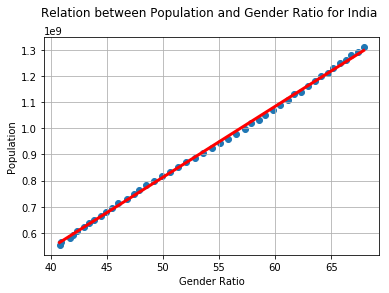

In [256]:
comb_india= combine[combine.Country=='India']
plt.scatter(comb_india['Gender Ratio'], comb_india['Population'])
plt.xlabel("Gender Ratio")
plt.ylabel("Population")
plt.title ("Relation between Population and Gender Ratio for India \n")
slope, intercept, r_value, p_value, std_err = linregress(comb_india['Gender Ratio'], comb_india['Population'])
line = [slope*xi + intercept for xi in comb_india['Gender Ratio']]
plt.plot(comb_india['Gender Ratio'],line,'r-', linewidth=3)
plt.grid(True)
plt.show()



Q. Can you see a relationship now? If so, what relationship is there? 

Ans. Population is increasing with improvement in Gender Ratio.

## A5. Visualising the Relationship over Time 

Now let's look at the relationship between gender ratio in schools and income over time. 

###### 1. Use Python to build a Motion Chart comparing the gender ratio in schools, the income, and the population of each country over time. The motion chart should show the gender ratio in schools on the x-axis, the income on the y-axis, and the bubble size should depend on the population. 

In [120]:
#filt= (combine.Country!='China' )& (combine.Country!='India')
mc=MotionChart(df=combine,key='Year',y='Income',x='Gender Ratio', size='Population', color='Country' )
mc.to_notebook()

###### 2. Run the visualisation from start to finish. (Hint: In Python, to speed up the animation, set timer bar next to the play/pause button to the minimum value.) And then answer the following questions:  

Q.Which two countries generally have the lowest gender ratio (women % men) in schools? 

Ans. Yemen & Afghanistan

Q. Which country has the highest gender ratio during the whole period of time? 

Ans. Lesotho & Qatar

Q. Is the gender ratio generally increasing or decreasing during the whole period of time? How about income? Explain your answer.  

Ans. As evident from the graph, Gender Ratio and Income is increasing during whole period of time.

Q. Select Cape Verde and Bolivia for this question: From which year onwards does Cape Verde start to have a higher gender ratio and a higher income from Bolivia. Please support your answer with a relevant python code and motion chart. 

Ans. From year 2006 - 2012 Cape Verde's Income was more than Bolivia.

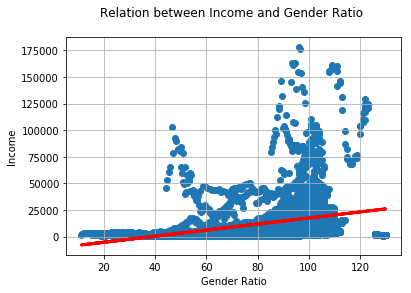

In [259]:
plt.scatter(combine['Gender Ratio'], combine['Income'])
plt.xlabel("Gender Ratio")
plt.ylabel("Income")
plt.title ("Relation between Income and Gender Ratio \n")
slope, intercept, r_value, p_value, std_err = linregress(combine['Gender Ratio'], combine['Income'])
line = [slope*xi + intercept for xi in combine['Gender Ratio']]
plt.plot(combine['Gender Ratio'],line,'r-', linewidth=3)
plt.grid(True)
plt.show()



In [119]:
filt= (combine.Country=='Cape Verde' ) |(combine.Country=='Bolivia')
mc=MotionChart(df=combine[filt],key='Year',y='Income',x='Gender Ratio', size='Population', color='Country' )
mc.to_notebook()

Q. Is there generally a relationship between the amount of income and gender ratio (women % men) in schools in all countries during the whole period of time? What kind of relationship? Explain your answer.   

Ans. Income and Gnder Ratio in school has increased increased over the time.

Q. Any other interesting things you notice in the data? Please support your answer with relevant python code and/or motion chart.

Ans. For Lesotho, Income has increased with decrease in gender ratio.

In [20]:
filt= (combine.Country=='Lesotho' )
mc=MotionChart(df=combine[filt],key='Year',y='Income',x='Gender Ratio', size='Population', color='Country' )
mc.to_notebook()

# Task B: Exploratory Analysis on Big Data 

In this part, you are required to do some exploratory analysis on the health insurance marketplace data. The file InsuranceRates.csv.zip contains data on health and dental plans offered to individuals and small businesses through the US Health Insurance Marketplace. This data was originally prepared and released by the Centers for Medicare & Medicaid Services (CMS), so please read the CMS Disclaimer-User Agreement before using this data. The data was then published on Kaggle. The file we provide is an extract from the data on Kaggle. Unzipped, the file is over 500MB and contains the following fields:

In [21]:
insurance=pd.read_csv("InsuranceRates.csv")

Load the InsuranceRates.csv data in Python and answer the following questions:  
- How many rows and columns are there? 

In [22]:
print(insurance.shape)

(12694445, 7)


Rows: 12694445.Column: 7

- How many years does the data cover? (Hint: pandas provides functionality to see 'unique' values.) 


In [23]:
insurance.BusinessYear.unique()

array([2014, 2015, 2016], dtype=int64)

It covers year 2014,2015 and 2016.

- What are the possible values for 'Age'? 

In [24]:
insurance.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

- How many states are there? 

In [25]:
insurance.StateCode.nunique()

39

- How many insurance providers are there? 


In [261]:
insurance.IssuerId.nunique()

910

-  What are the average, maximum and minimum values for the monthly insurance premium cost for an individual? Do those values seem reasonable to you?  

In [27]:
# from numpy import *
# filt= isnan(insurance['IndividualTobaccoRate'])==True

# insurance[filt] = insurance[filt].replace(NaN,0)
# insurance['Total'] = insurance['IndividualRate']+insurance['IndividualTobaccoRate']
insurance.IndividualRate.describe()

count    1.269444e+07
mean     4.098026e+03
std      6.122271e+04
min      0.000000e+00
25%      2.933000e+01
50%      2.916000e+02
75%      4.789800e+02
max      9.999990e+05
Name: IndividualRate, dtype: float64

Average:4098.026
Maximum:99999
Minimum: 0
Maximum and Minimum seems to be assumptions of the figure and not actual figures, Hence it will also influence average and does not seem to be reasonable. 

## B2. Investigating Individual Insurance Costs 
Now let's look more in detail at the individual insurance costs. 

- Show the distribution of ‘IndividualRate’ values using a histogram.


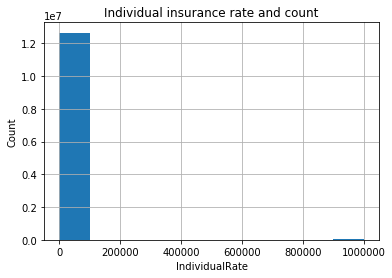

In [28]:
insurance.IndividualRate.hist()
plt.xlabel("IndividualRate")
plt.ylabel("Count")
plt.grid(True)
plt.title ("Individual insurance rate and count")
plt.show()

- Does the distribution make sense to? What might be going on?  

Majority of values are between 0-10000 with few outliers causing the graph to disproportinate.

###### 2. Remove rows with insurance premiums of 0 (or less) and over 2000. (Use this data from now on.) Generate a new histogram with a larger number of bins (say 200). 

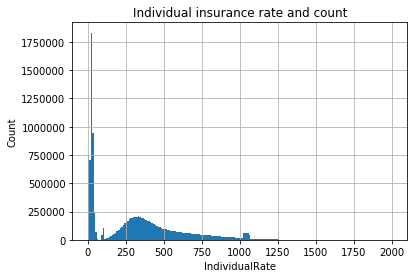

In [264]:
filt=(insurance.IndividualRate>=0)&(insurance.IndividualRate<2000)
insurance.IndividualRate[filt].hist(bins=200)
plt.xlabel("IndividualRate")
plt.ylabel("Count")
plt.grid(True)
plt.title ("Individual insurance rate and count")
plt.show()

# insurance.drop(insurance[insurance.IndividualRate<=0].index)
# insurance.drop(insurance[insurance.IndividualRate>2000].index)

# insurance.IndividualRate.hist()


- Does this data look more sensible?

Yes. Data is more correct now.

- Describe the data. How many groups can you see

Graph seems almost like a continous graph. There are 200 groups/bins in the graph

## B3. Variation in Costs across States 
How do insurance costs vary across states? 

###### 1. Generate a graph containing boxplots summarising the distribution of values for each state.  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]), <a list of 39 Text xticklabel objects>)

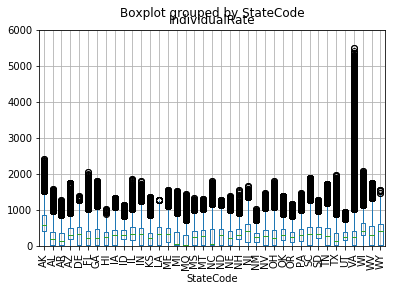

In [265]:
insurance.boxplot(column='IndividualRate',by='StateCode', meanline=True,showcaps=False)
fig,ax= plt.ylim(0,2000)
plt.grid(True)
plt.xticks(rotation=90)

Reference: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

- Which state has the lowest median insurance rates and which one has the highest? (Hint: you may need to rotate the state labels to be able to read the plot.) 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]), <a list of 39 Text xticklabel objects>)

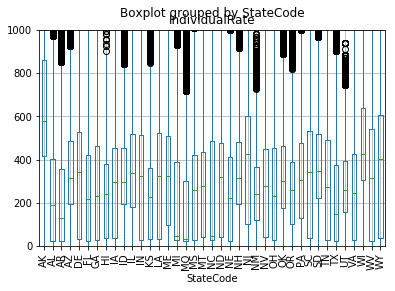

In [31]:
insurance.boxplot(column='IndividualRate',by='StateCode', meanline=True,showcaps=False)
fig,ax= plt.ylim(0,1000)
plt.grid(True)
plt.xticks(rotation=90)

Ans. MO has the lowest median insurance rates, while AK has the highest median insurance rate

###### 2. Does the number of insurance issuers vary greatly across states? 

- Create a bar chart of the number of insurance companies in each state to see.

Reference: https://pythonspot.com/matplotlib-bar-chart/

C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


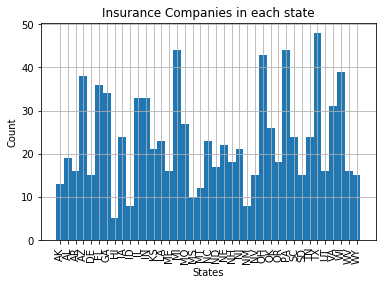

In [73]:
fun={'IssuerId':{'Count':'nunique' }}
new=insurance.groupby(['StateCode']).agg(fun).reset_index()
new.columns=new.columns.droplevel(0)
new.rename(columns = {'':'StateCode'},inplace = True)
ind = np.arange(new.StateCode.count())
width=1
plt.bar(ind,new.Count,width )
plt.xticks (ind,new.StateCode,rotation='vertical')
plt.xlabel("States")
plt.ylabel("Count")
plt.title ("Insurance Companies in each state")
plt.grid(True)
plt.show()

###### 3. Could competition explain the difference in insurance premiums across states? 

- Use a scatterplot to plot the number of insurance issuers against the median insurance cost for each state.
- Do you observe a relationship? 

C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


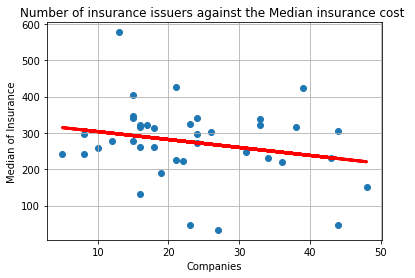

In [71]:
#Count if comany in each state
fun={'IssuerId':{'Count':'nunique' }}
new=insurance.groupby(['StateCode']).agg(fun).reset_index()
new.columns=new.columns.droplevel(0)
new.rename(columns = {'':'StateCode'},inplace = True)

fun={'IndividualRate':{'Median':'median' }}
gb= insurance.groupby(['StateCode']).agg(fun).reset_index()
gb.columns=gb.columns.droplevel(0)
gb.rename(columns = {'':'StateCode'},inplace = True)
med_issuer= pd.merge(gb,new, on=['StateCode'])

plt.scatter(med_issuer['Count'], med_issuer['Median'])
plt.xlabel("Companies")
plt.ylabel("Median of Insurance")
plt.title ("Number of insurance issuers against the Median insurance cost ")
slope, intercept, r_value, p_value, std_err = linregress(med_issuer['Count'], med_issuer['Median'])
line = [slope*xi + intercept for xi in med_issuer['Count']]
plt.plot(med_issuer['Count'],line,'r-', linewidth=3)
plt.grid(True)
plt.show()




## B4. Variation in Costs over Time and with Age 
Generate boxplots (or other plots) of insurance costs versus year and age to answer the following questions:  

###### 1. Are insurance policies becoming cheaper or more expensive over time? 


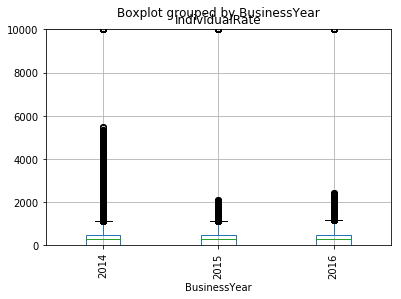

In [267]:
insurance.boxplot(column='IndividualRate', by='BusinessYear',meanline=True)
plt.ylim(0,10000)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

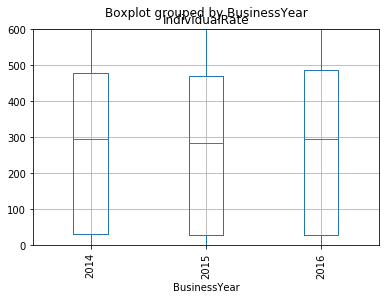

In [269]:
insurance.boxplot(column='IndividualRate', by='BusinessYear',meanline=True)
plt.ylim(0,600)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Ans. Seems like, Insurance is becoming cheaper with time

- Is the median insurance cost increasing or decreasing? 

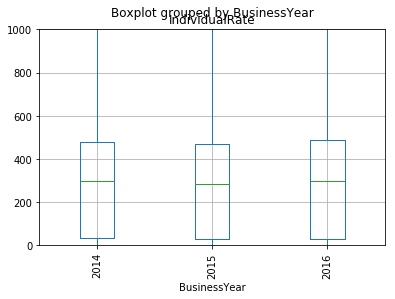

In [35]:
insurance.boxplot(column='IndividualRate', by='BusinessYear',meanline=True)
plt.ylim(0,1000)
plt.xticks(rotation=90)
plt.show()

Ans. Median Insurance cost has fluctuated over the years, but Median insurance cost of 2016 is somewhat similar when compared with the year 2014

###### 2. How does insurance costs vary with the age of the person being insured? (Hint: filter out the value 'Family Option' before plotting the data.) 

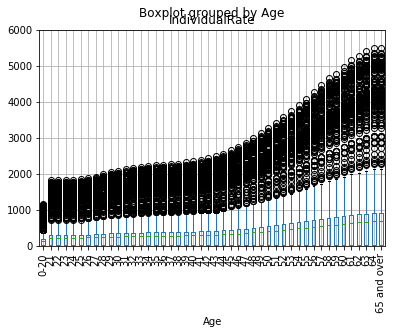

In [36]:
filt_insurance=insurance[insurance['Age']!='Family Option']
filt_insurance.boxplot(column='IndividualRate', by='Age',meanline=True)
plt.ylim(0,6000)
plt.xticks(rotation=90)

plt.show()

Ans. Insurance cost increase with increase in age

- In terms of median cost, do older people pay more or less for insurance than younger people? How much more/less to they pay? 

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


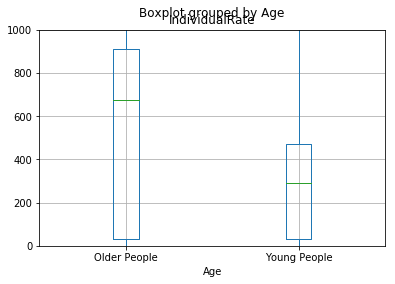

In [272]:
young_old=insurance[insurance['Age']!='Family Option']

young = young_old[young_old['Age']!='65 and over']
young['Age']='Young People'

old =young_old[young_old['Age']=='65 and over']
old['Age']='Older People'
frame=[old,young]
com=pd.concat(frame)
com.head()
com.boxplot(column='IndividualRate', by='Age')
plt.ylim(0,1000)
plt.grid(True)
plt.show()



Reference https://pandas.pydata.org/pandas-docs/stable/merging.html

In Terms of Median cost Older people pay around three times more as compared to Young people.

# Task C

Reference of Data: https://www.kaggle.com/mehdidag/black-friday

In [45]:
BlackFriday=pd.read_csv('BlackFriday.csv')
BlackFriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


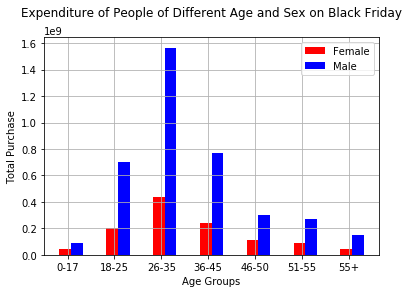

In [208]:
s]).agg(fun).reset_index()
groupby.columns=groupby.columns.droplevel(1)
groupby.count()
ind =np.arange(0,groupby.count().Gender,2)
width=0.5
fig, ax = plt.subplots()
rects1 = ax.bar(ind, groupby[groupby['Gender']=='F'].Purchase, width, color='r')
rects2 = ax.bar(ind + width, groupby[groupby['Gender']=='M'].Purchase, width, color='b')
ax.set_ylabel('Total Purchase')
ax.set_xlabel('Age Groups')

ax.set_title('Expenditure of People of Different Age and Sex on Black Friday\n')
ax.legend((rects1[0], rects2[0]), ('Female', 'Male'))
ax.set_xticks(ind +0.1)
ax.set_xticklabels(groupby['Age'])
plt.grid(True)
plt.show()


C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


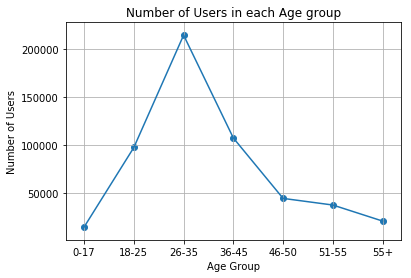

In [218]:
fun={'User_ID':{'Count':'count'}}
Age_Count=BlackFriday.groupby("Age").agg(fun).reset_index()
Age_Count.columns=Age_Count.columns.droplevel(1)
plt.plot(Age_Count.User_ID)
plt.scatter(Age_Count['Age'],Age_Count['User_ID'])
plt.title("Number of Users in each Age group")
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

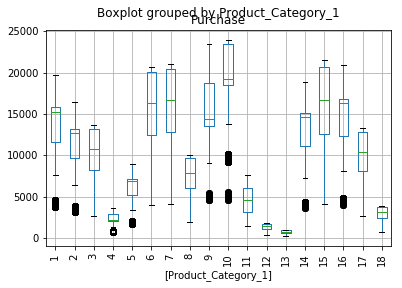

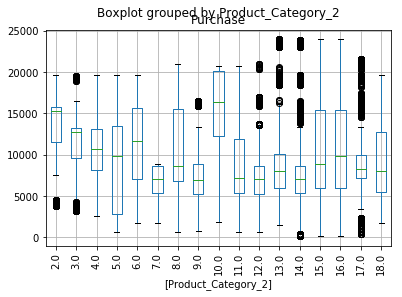

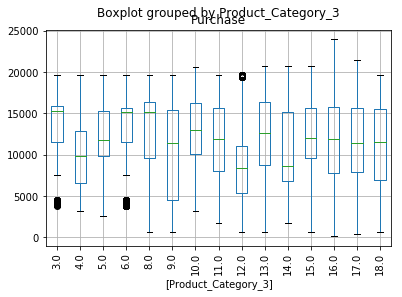

In [150]:
BlackFriday.boxplot(column='Purchase', by=['Product_Category_1'])
plt.xticks(rotation=90)
BlackFriday.boxplot(column='Purchase', by=['Product_Category_2'])
plt.xticks(rotation=90)
BlackFriday.boxplot(column='Purchase', by=['Product_Category_3'])
plt.xticks(rotation=90)


In [206]:
fun={'Purchase':{'Purchase':'sum'},'User_ID':{'Users':'count'}}
group=BlackFriday.groupby('Product_ID').agg(fun).reset_index()
group.columns=group.columns.droplevel(0)
group.rename(columns = {'':'Product_ID'},inplace = True) 
print(group[group.Users==group.Users.max()])
print(group[group.Purchase==group.Purchase.max()])

     Product_ID  Purchase  Users
2534  P00265242  13983325   1858
    Product_ID  Purchase  Users
249  P00025442  27532426   1586


C:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
